In [1]:
from google.colab import files
uploaded = files.upload()

Saving fruits-360_dataset_100x100.zip to fruits-360_dataset_100x100.zip


In [3]:
import zipfile
import os

# Specify the file path of the zip file
zip_path = '/content/fruits-360_dataset_100x100.zip'
extract_folder = 'fruits-360_dataset_100x100/'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to {extract_folder}")

Dataset extracted to fruits-360_dataset_100x100/


In [4]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 141
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = '/content/fruits-360_dataset_100x100/fruits-360/Training'
validation_data_dir = '/content/fruits-360_dataset_100x100/fruits-360/Test'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [5]:
model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 141)                 │          72,333 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 141)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,318,061 (5.03 MB)

 Trainable params: 1,318,061 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback for saving the best model based on validation loss
checkpoint = ModelCheckpoint("fruits_cnn.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# Callback for early stopping when validation loss stops improving
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback for reducing learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.2,
                               patience=3,
                               verbose=1,
                               min_delta=0.0001)

# We put our callbacks into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# Compile the model with a very small learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),  # Correcting the deprecated argument
              metrics=['accuracy'])

# Number of training and validation samples
nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

# Using `fit` instead of `fit_generator` (recommended in TensorFlow 2.x)
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.1474 - loss: 3.5079
Epoch 1: val_loss improved from inf to 1.38851, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 295s 114ms/step - accuracy: 0.1474 - loss: 3.5075 - val_accuracy: 0.5998 - val_loss: 1.3885 - learning_rate: 0.0010
Epoch 2/10
1824/2582 ━━━━━━━━━━━━━━━━━━━━ 1:14 98ms/step - accuracy: 0.6116 - loss: 1.2367

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.38851 to 1.02164, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 194s 75ms/step - accuracy: 0.6226 - loss: 1.2004 - val_accuracy: 0.7467 - val_loss: 1.0216 - learning_rate: 0.0010
Epoch 3/10
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7366 - loss: 0.8488
Epoch 3: val_loss improved from 1.02164 to 0.65203, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 262s 102ms/step - accuracy: 0.7366 - loss: 0.8488 - val_accuracy: 0.8289 - val_loss: 0.6520 - learning_rate: 0.0010
Epoch 4/10
1824/2582 ━━━━━━━━━━━━━━━━━━━━ 1:11 95ms/step - accuracy: 0.8030 - loss: 0.6429
Epoch 4: val_loss improved from 0.65203 to 0.36327, saving model to fruits_cnn.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 188s 73ms/step - accuracy: 0.8051 - loss: 0.6379 - val_accuracy: 0.8921 - val_loss: 0.3633 - learning_rate: 0.0010
Epoch 5/10
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8303 - loss: 0.5704
Epoch 5: val_loss did not improve fr

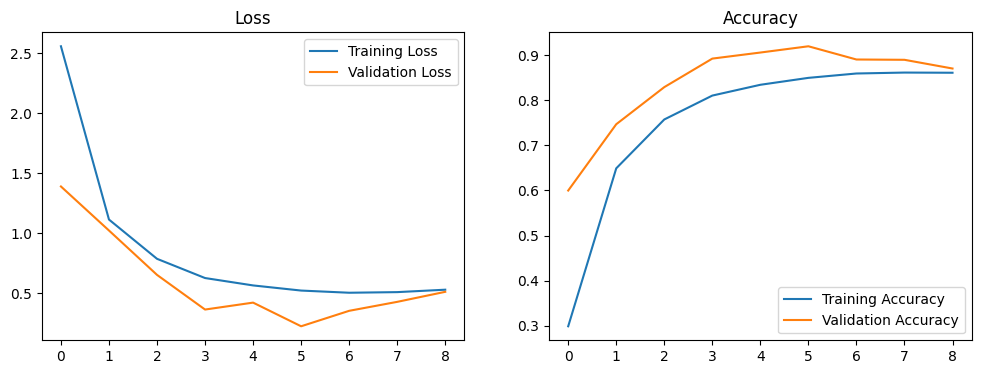

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Calculate the correct number of steps for the validation data
validation_steps = validation_generator.samples // validation_generator.batch_size

# Predict the output for the validation data
Y_pred = model.predict(validation_generator, steps=validation_steps, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
print('Confusion Matrix')
conf_matrix = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)
print(conf_matrix)

# Classification Report
print('Classification Report')
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes[:len(y_pred)], y_pred, target_names=class_labels))


1476/1476 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step
Confusion Matrix
[[118   0   0 ...   0   0   0]
 [  0 164   0 ...   0   0   0]
 [  0   2 108 ...   0   0   0]
 ...
 [  0   0   0 ... 157   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  77]]
Classification Report
                       precision    recall  f1-score   support

              Apple 6       1.00      0.75      0.86       157
     Apple Braeburn 1       0.46      1.00      0.63       164
 Apple Crimson Snow 1       0.80      0.73      0.76       148
       Apple Golden 1       0.88      0.85      0.87       160
       Apple Golden 2       1.00      1.00      1.00       164
       Apple Golden 3       0.90      0.94      0.92       161
 Apple Granny Smith 1       0.94      1.00      0.97       164
    Apple Pink Lady 1       0.79      0.93      0.85       152
          Apple Red 1       0.88      0.92      0.90       164
          Apple Red 2       1.00      0.71      0.83       164
          Apple Red 3       0.

868/868 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step


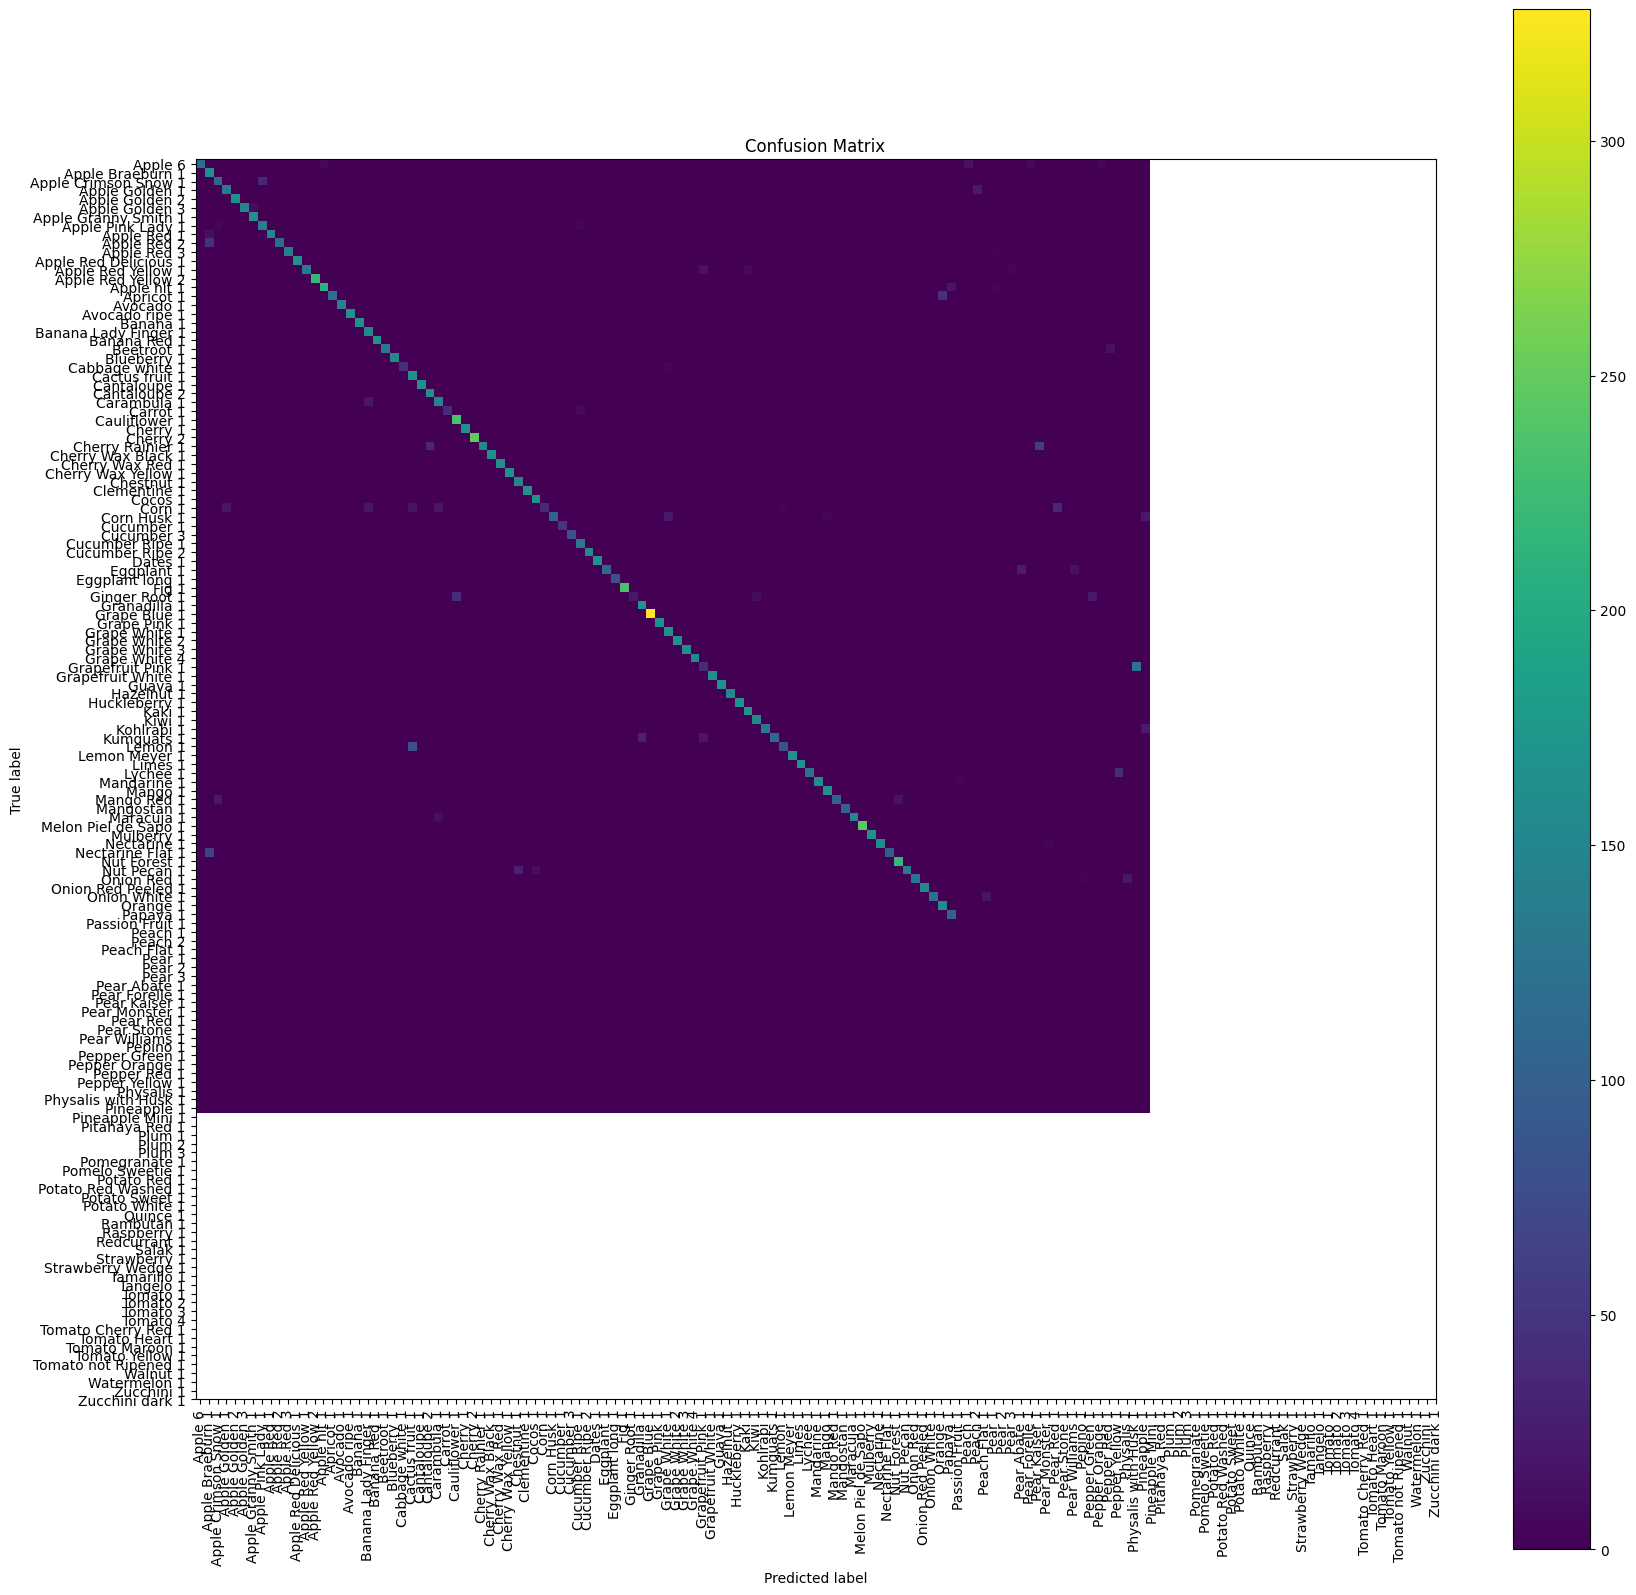

                       precision    recall  f1-score   support

              Apple 6       1.00      0.75      0.86       157
     Apple Braeburn 1       0.56      1.00      0.72       164
 Apple Crimson Snow 1       0.80      0.73      0.76       148
       Apple Golden 1       0.88      0.85      0.87       160
       Apple Golden 2       1.00      1.00      1.00       164
       Apple Golden 3       1.00      0.94      0.97       161
 Apple Granny Smith 1       0.94      1.00      0.97       164
    Apple Pink Lady 1       0.79      0.93      0.85       152
          Apple Red 1       1.00      0.92      0.96       164
          Apple Red 2       1.00      0.71      0.83       164
          Apple Red 3       1.00      0.97      0.99       144
Apple Red Delicious 1       1.00      1.00      1.00       166
   Apple Red Yellow 1       1.00      0.82      0.90       164
   Apple Red Yellow 2       1.00      1.00      1.00       219
          Apple hit 1       0.96      0.91      0.93  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
import numpy as np

img_row, img_height, img_depth = 32, 32, 3
model = load_model('/content/fruits_cnn.keras')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877
batch_size = 16  # Ensure this matches the batch size used in the generator

# Confusion Matrix and Classification Report
# Use model.predict() instead of predict_generator
Y_pred = model.predict(validation_generator, steps=nb_validation_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
cnf_matrix = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Match target_names to the classes present in y_pred
target_names = [class_labels[i] for i in np.unique(y_pred)]

# Print classification report with matched target names
print(classification_report(validation_generator.classes[:len(y_pred)], y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


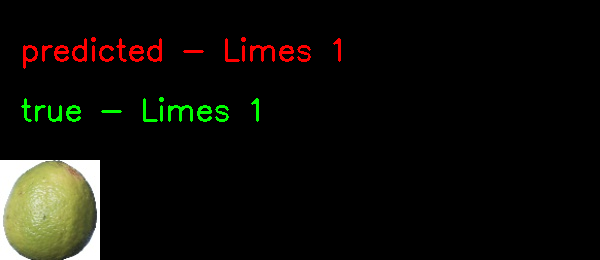

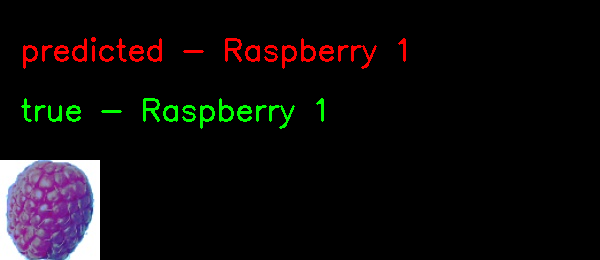

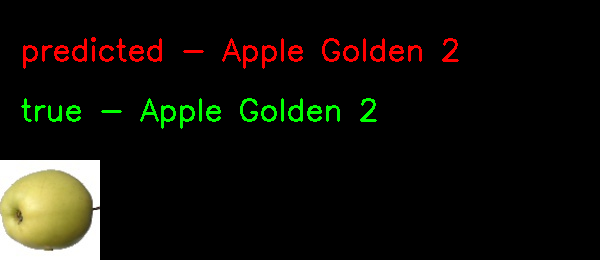

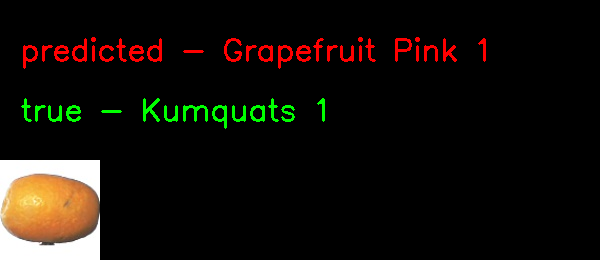

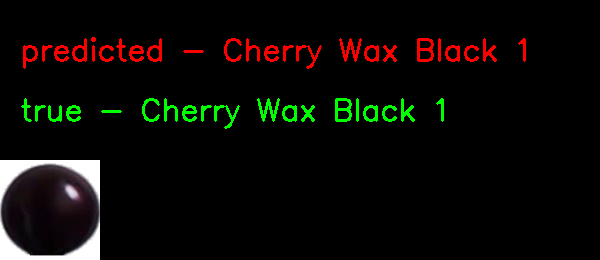

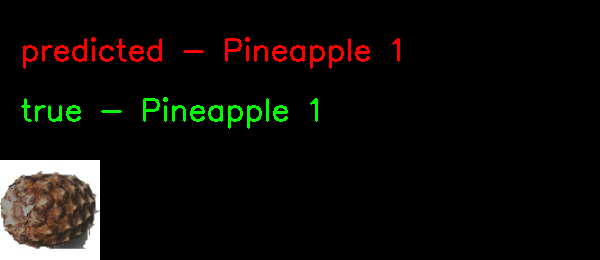

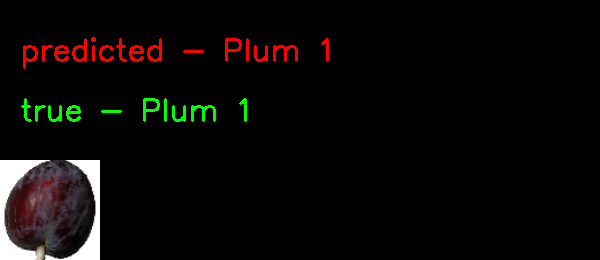

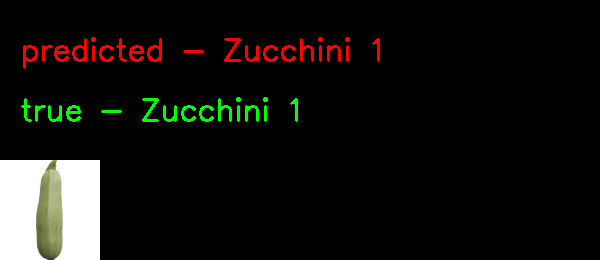

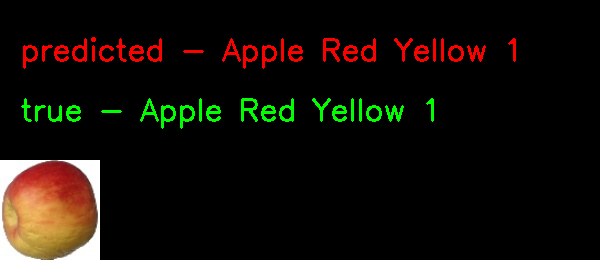

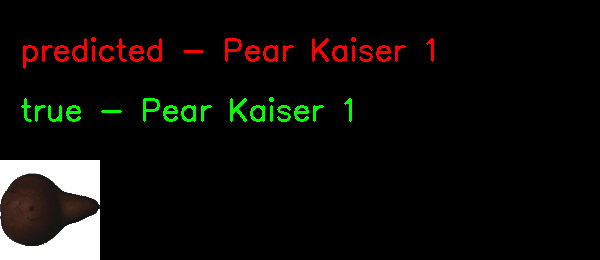

In [13]:
import os
import numpy as np
from os import listdir
from os.path import isfile, join
import cv2
from keras.models import load_model
from keras.preprocessing import image
from google.colab.patches import cv2_imshow  # Import the correct function for Colab

# Function to draw the prediction on the image
def draw_test(name, pred, im, true_label):
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500, cv2.BORDER_CONSTANT, value=BLACK)
    cv2.putText(expanded_image, "predicted - " + pred, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(expanded_image, "true - " + true_label, (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(expanded_image)  # Use cv2_imshow instead of cv2.imshow

# Function to randomly fetch an image
def getRandomImage(path, img_width, img_height):
    """Function loads a random image from a random folder in the test path."""
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = os.path.join(path, path_class)
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = os.path.join(file_path, image_name)
    return image.load_img(final_path, target_size=(img_width, img_height)), final_path, path_class

# Dimensions of our images
img_width, img_height = 32, 32

files = []
predictions = []
true_labels = []

# Load the model
model = load_model('/content/fruits_cnn.keras')

# Class labels mapping
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Predicting images
for i in range(10):
    path = '/content/fruits-360_dataset_100x100/fruits-360/Test'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1.0 / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = np.argmax(model.predict(images), axis=1)
    predictions.append(classes)

# Displaying results
for i in range(len(files)):
    im = cv2.imread(files[i])
    draw_test("Prediction", class_labels[predictions[i][0]], im, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()
